objective: 

take a network, $G$, a function $h:V(G)\rightarrow X$
We want:
* identify minima
* partition into basins
* indentify saddle points

In [1]:
import numpy as np
import networkx as nx
import math
import matplotlib
import landscapeofcomplexnetworks as lcn

In [2]:
G = nx.karate_club_graph()

In [3]:
import math
h = lcn.perturb_function(lambda x: -math.log(G.degree(x)), G.nodes())

Algorithm 1:

In [4]:
C, basin, blank_nodes = lcn.Fast_search_of_nondegenerate_critical_nodes(G,h)
for node, value in basin.items():
    G.nodes[node]['basin'] = value

In [5]:
layout = nx.spring_layout(G)

/home/isla/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


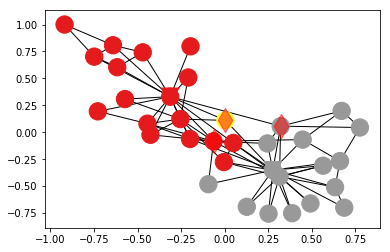

In [6]:
%matplotlib inline   
nx.draw_networkx_edges(G, pos=layout)
nx.draw_networkx_nodes(G, pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color=[v for k,v in G.nodes.data('basin')], cmap='Set1')

nx.draw_networkx_nodes(G.subgraph(C[1]), pos=layout, nodesize=20, node_shape='d', alpha=0.5, nodecolor=[v for k,v in G.subgraph(C[0]).nodes.data('basin')], cmap='Set1')
nx.draw_networkx_nodes(G.subgraph(C[2]), pos=layout, nodesize=20, node_shape='s', alpha=0.5, nodecolor=[v for k,v in G.subgraph(C[0]).nodes.data('basin')], cmap='Set1')
nx.draw_networkx_nodes(G.subgraph(C[0]), pos=layout, nodesize=[h(x)*300 for x in G.subgraph(C[0]).nodes()], node_color=[v for k,v in G.subgraph(C[0]).nodes.data('basin')], node_shape='v', cmap='Set1')


In [9]:
for k, c_k in C.items():
    if c_k:
        print('C_{}:'.format(k))
        for att, val in c_k.items():
            print('critical point:', att, ', basin:', val)
        print('\n')

C_0:
critical point: 33 , basin: {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29}
critical point: 0 , basin: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 16, 17, 21}


C_1:
critical point: 2 , basin: {8, 2, 13, 30}
critical point: 31 , basin: {31}
critical point: 19 , basin: {19}


